In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data
concrete_data = pd.read_csv('concrete.csv')

In [3]:
#Shape of the data
concrete_data.shape

(1030, 9)

In [4]:
#Getting the overview of the given data
concrete_data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [5]:
#information about the dataset
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
#Checking for any missing values
concrete_data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
#From above information it is found that there is no missing values but we can see lot of zeros in few attributes. Sometimes those zeros indicates that particular attribute is not used for preparing the concrete
#Let's get the count of zeros in each column and decide what will be the scenerios

In [8]:
for i,cols in enumerate(concrete_data.columns):
    num_zeros = concrete_data[concrete_data[cols]==0.0].count()[i]
    print('Number of Zeros in {} column is {}'. format(cols,num_zeros))

Number of Zeros in cement column is 0
Number of Zeros in slag column is 471
Number of Zeros in ash column is 566
Number of Zeros in water column is 0
Number of Zeros in superplastic column is 379
Number of Zeros in coarseagg column is 0
Number of Zeros in fineagg column is 0
Number of Zeros in age column is 0
Number of Zeros in strength column is 0


In [9]:
#From above information it is clear that attributes slag, Ash and superplastic have lot of zeros and it signifies that those attributes are not used for concrete. So no need to alter those values

In [10]:
#Lets gain the insight through 5 points summary
concrete_data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


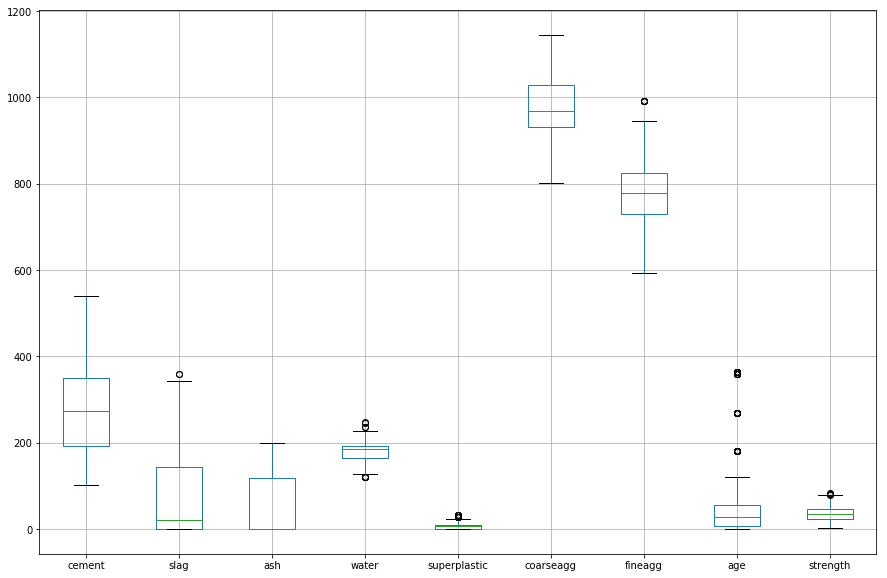

In [11]:
#Lets plot boxplot and check for any ouliers
concrete_data.boxplot(figsize=(15,10))

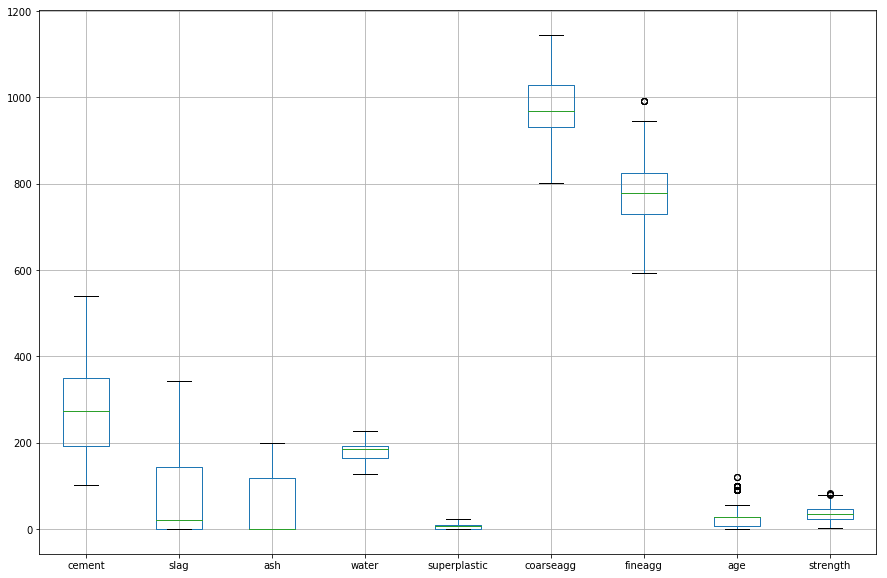

In [12]:
#Few outliers are there and we can address them by imputing the median values
out_cols = ['slag', 'water', 'superplastic','age']
for cols in out_cols:
    q1,q2,q3 = concrete_data[cols].quantile([0.25,0.5,0.75])
    IQR = q3-q1
    a = concrete_data[cols] > q3 + 1.5*IQR
    b = concrete_data[cols] < q1 - 1.5*IQR
    concrete_data[cols] = np.where(a | b, q2,concrete_data[cols])
    
concrete_data.boxplot(figsize=(15,10))

In [13]:
#Now outliers are addressed and they are minimized compared to raw data

C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' 

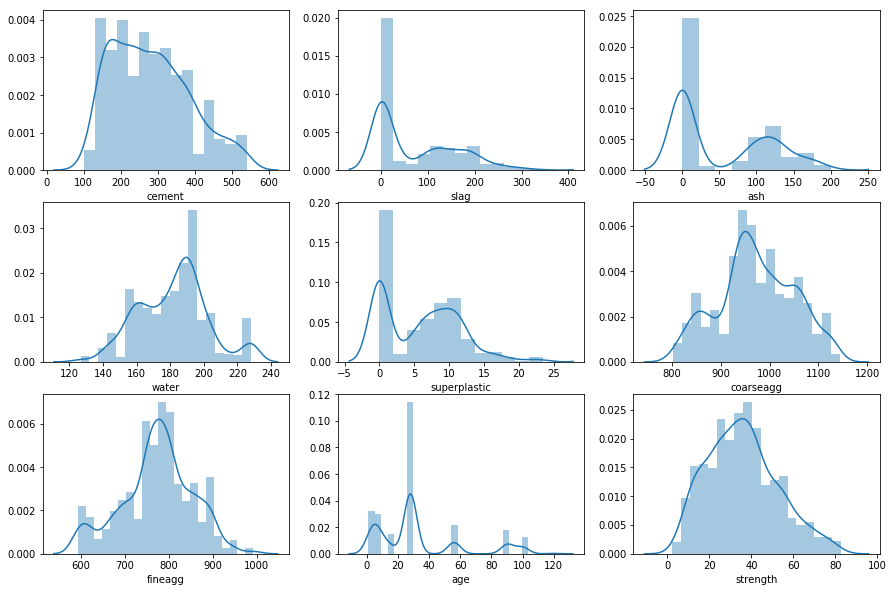

In [14]:
#Univariate analysis

plt.figure(figsize=(15,10))
pos =1
for i in concrete_data.columns:
    plt.subplot(3,3,pos)
    sns.distplot(concrete_data[i])
    pos+=1

In [15]:
#From above plot we can notice that none of the attribute have proper normal distribution curve. Attributes like Cement, coarseagg, fineagg and strength seems to follow some kind of normal distributes and lets explore how they are related with other attributes through multivariate analysis

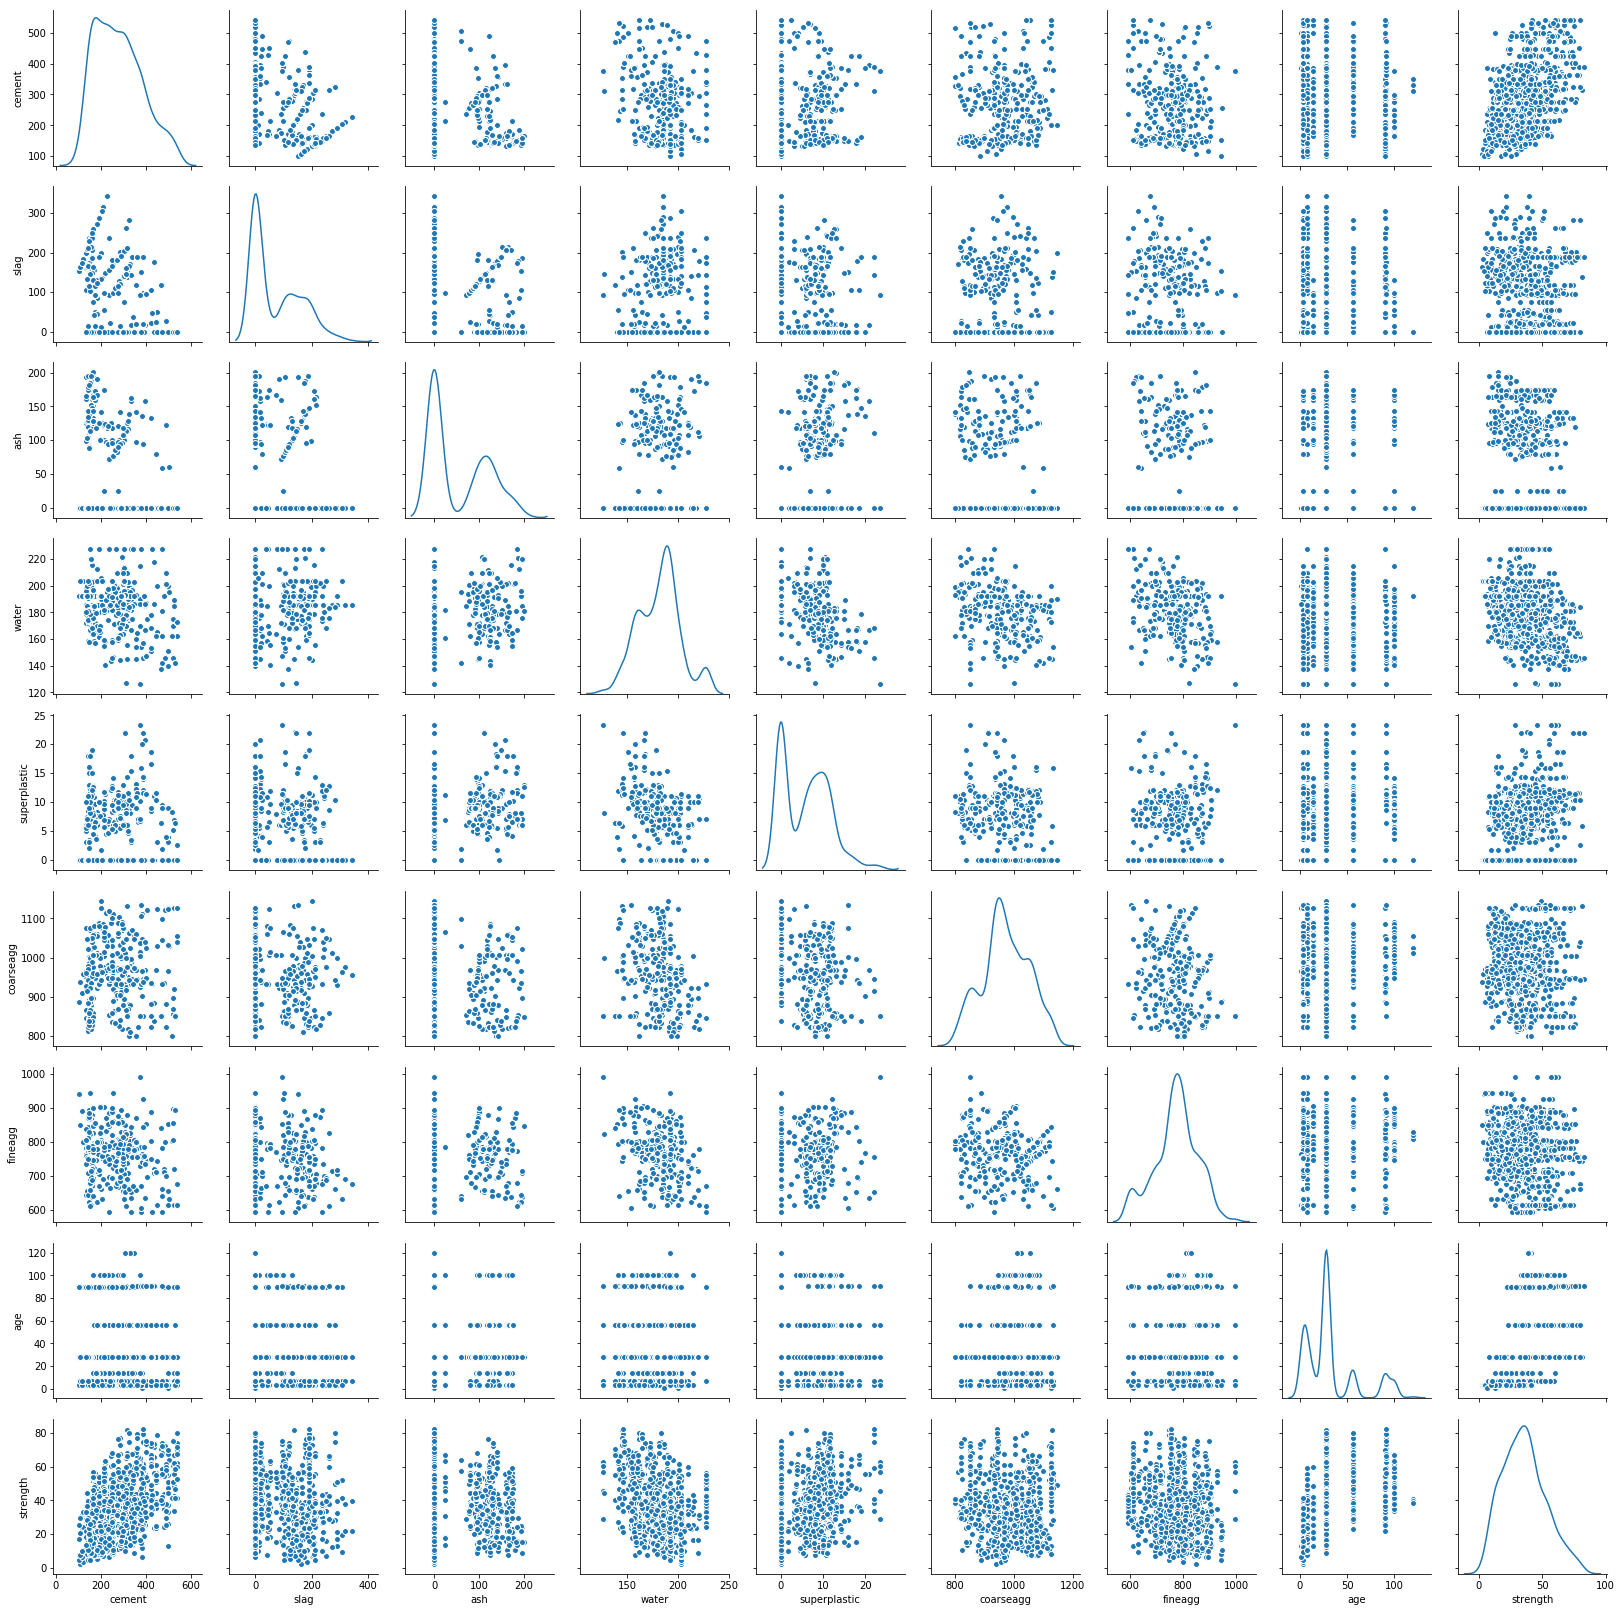

In [16]:
#Multivariate analysis
sns.pairplot(concrete_data,diag_kind='kde')

In [17]:
concrete_data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275046,-0.397467,-0.091614,0.013336,-0.109349,-0.222718,-0.031962,0.497832
slag,-0.275046,1.000000,-0.320468,0.098880,0.061195,-0.283882,-0.274086,-0.028971,0.137800
ash,-0.397467,-0.320468,1.000000,-0.248011,0.447492,-0.009961,0.079108,0.057928,-0.105755
water,-0.091614,0.098880,-0.248011,1.000000,-0.658056,-0.156928,-0.452978,-0.040304,-0.307711
superplastic,0.013336,0.061195,0.447492,-0.658056,1.000000,-0.224503,0.194806,0.062013,0.346260
coarseagg,-0.109349,-0.283882,-0.009961,-0.156928,-0.224503,1.000000,-0.178481,0.018078,-0.164935
fineagg,-0.222718,-0.274086,0.079108,-0.452978,0.194806,-0.178481,1.000000,0.052789,-0.167241
age,-0.031962,-0.028971,0.057928,-0.040304,0.062013,0.018078,0.052789,1.000000,0.499850
strength,0.497832,0.137800,-0.105755,-0.307711,0.346260,-0.164935,-0.167241,0.499850,1.000000


In [18]:
#From above information we see there is no much correlation between the attributes. We see maximum of 0.65 negative correlation b/w water and superplastice. Whereas rest other attributes are less than +/- 0.5
#Also we can notice minimum 3 or 4 clustering from pairplot.

In [19]:
#Scaling the data
from scipy.stats import zscore

concrete_data_scaled = concrete_data.apply(zscore)

concrete_data_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.625902,-0.847144,1.060879,-1.091166,-0.014398,-0.312970,-0.153159,-0.355018
1,-1.074790,-0.363717,1.096078,-1.134020,0.881615,1.388141,0.282260,-0.656933,-0.737108
2,-0.298384,-0.858192,0.648965,0.279067,-0.086509,-0.206121,1.093371,-0.153159,-0.395144
3,-0.145209,0.477594,-0.847144,2.250592,-1.091166,-0.526517,-1.292542,-0.153159,0.600806
4,-1.209776,1.290784,-0.847144,0.565570,0.571085,0.958372,-0.959363,-0.153159,-1.049727


In [20]:
#Splitting the Data
X = concrete_data.drop(['strength'], axis=1) 
y= concrete_data_scaled['strength']
print(X.shape)
print(y.shape)


(1030, 8)
(1030,)


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train.shape)
print(X_test.shape)

(721, 8)
(309, 8)


In [22]:
#Building Decision Tree Regressor and checking feature importance
from sklearn.tree import DecisionTreeRegressor


In [23]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)
print(dt_reg.score(X_train,y_train))
print(dt_reg.score(X_test,y_test))

0.9917907393004437
0.8451024115721829


In [24]:
print(pd.DataFrame(dt_reg.feature_importances_,columns=["Imp"],index=X_train.columns))

                   Imp
cement        0.351017
slag          0.094031
ash           0.012113
water         0.129833
superplastic  0.018229
coarseagg     0.034231
fineagg       0.032023
age           0.328524


In [25]:
#From above information it looks like ash, superplastic, coarseagg and fineagg doesn't have effect in predicting the target, so we can drop them.

In [26]:
#Splitting the Data
X = concrete_data.drop(['strength', 'ash', 'superplastic','coarseagg','fineagg'], axis=1) 
y= concrete_data_scaled['strength']
print(X.shape)
print(y.shape)

(1030, 4)
(1030,)


In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train.shape)
print(X_test.shape)

(721, 4)
(309, 4)


In [28]:
#Building a Descison tree model with reduced columns
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [30]:
print ('Accuracy score of train set is {}'. format(dt_reg.score(X_train,y_train)))

Accuracy score of train set is 0.990059622939761


In [31]:
print ('Accuracy score of test set is {}'. format(dt_reg.score(X_test,y_test)))

Accuracy score of test set is 0.8493561512722425


In [32]:
#Without any hyperparameter tuning, DecsionTreeRegressor model overfits in the training sets and performs bit low in test set

In [33]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

dt_Tree_File = open('d:\concrete_str.dot','w')
dot_data = tree.export_graphviz(dt_reg, out_file=dt_Tree_File, feature_names = list(X_train))

dt_Tree_File.close()

In [34]:
#Copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view for the model

In [35]:
#Lets build KMeans clustering and try to understand any pattern
from sklearn.cluster import KMeans

In [36]:
cluster_range = range (1,12)
cluster_error = []
for i in cluster_range:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(concrete_data_scaled)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    cluster_error.append(kmeans.inertia_)

In [37]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_error } )
clusters_df.head(10)

,num_clusters,cluster_errors
0,1,9270.000000
1,2,7558.283601
2,3,6359.063080
3,4,5575.724226
4,5,5111.445673
5,6,4653.261839
6,7,4247.656051
7,8,3966.397181
8,9,3755.207239
9,10,3524.866318


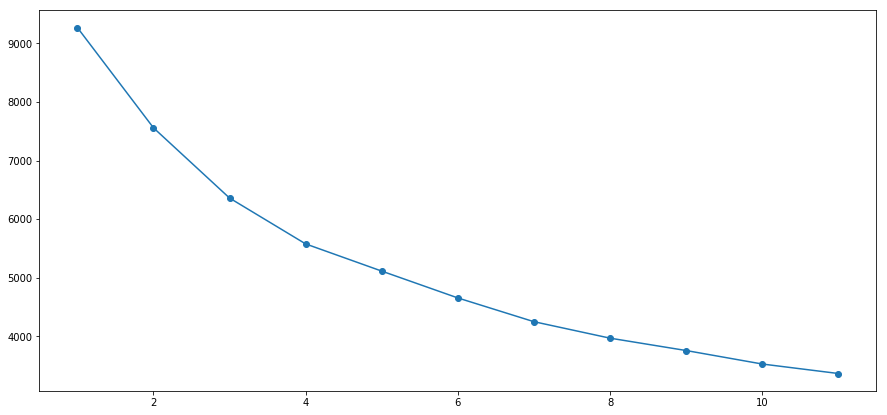

In [38]:
#Optimal K value
plt.figure(figsize=(15,7))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors,marker = "o" )

In [39]:
#We will proceed with K value as 6
kmeans = KMeans(n_clusters=6)
kmeans.fit(concrete_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
labels = kmeans.labels_
labels

array([4, 0, 0, ..., 3, 5, 5])

In [41]:
counts = np.bincount(labels)
print(counts)

[268 182 189 133 170  88]


In [42]:
label_data = pd.DataFrame(labels,columns=['labels'])
label_data = label_data.astype('category')
combined_data_label = concrete_data.join(label_data)
combined_data_label.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,labels
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89,4
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51,0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22,0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85,5
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA89598DD8>,
      dtype=object)

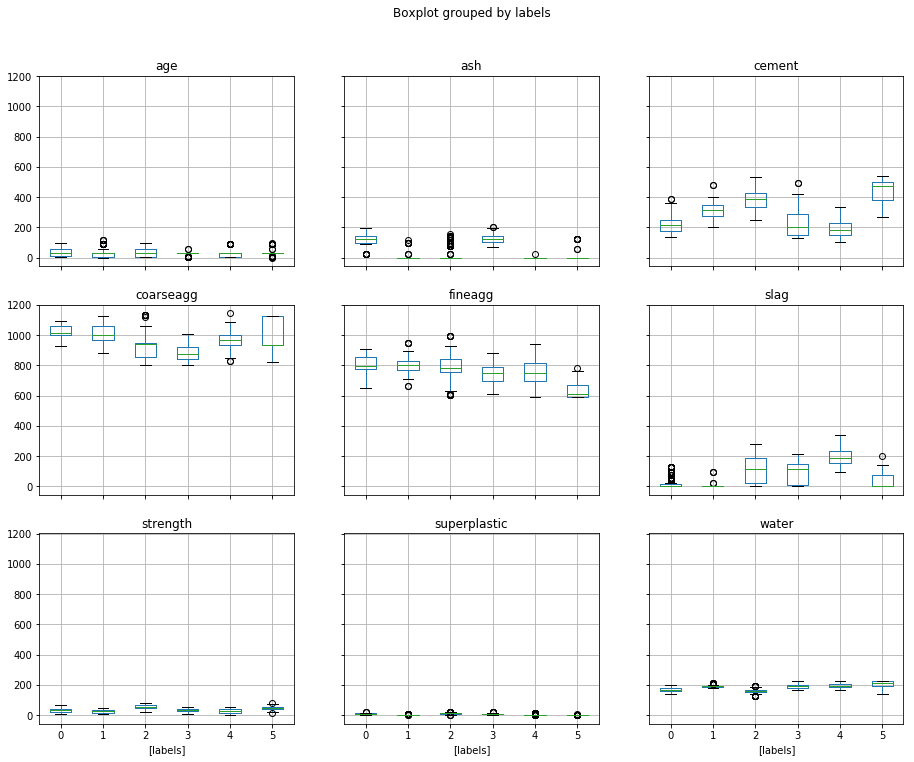

In [43]:
combined_data_label.boxplot(by='labels',figsize=(15,12))

In [44]:
#From above information no good clusters are observed, so spliting the data based on cluster and building the model is not a good idea

In [45]:
#Decision Tree Model
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [46]:
print ('Accuracy score of train set is {}'. format(dt_reg.score(X_train,y_train)))

Accuracy score of train set is 0.990059622939761


In [47]:
print ('Accuracy score of test set is {}'. format(dt_reg.score(X_test,y_test)))

Accuracy score of test set is 0.8530140250983813


In [48]:
print(pd.DataFrame(dt_reg.feature_importances_,columns=['IMP'],index=list(X_train.columns)))

             IMP
cement  0.384441
slag    0.109918
water   0.176719
age     0.328922


In [49]:
#print('Intercept of Decision Tree model is : {}'. format(dt_reg.intercept_))


In [50]:
#Building GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [51]:
print ('Accuracy score of GradientBoostReg model on train set is {}'. format(gb.score(X_train,y_train)))
print ('Accuracy score of GradientBoostReg model on test set is {}'. format(gb.score(X_test,y_test)))

Accuracy score of GradientBoostReg model on train set is 0.9334737877053011
Accuracy score of GradientBoostReg model on test set is 0.8690417888834063


In [52]:
#Building RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [53]:
print ('Accuracy score of RandomForestReg model on train set is {}'. format(rf.score(X_train,y_train)))
print ('Accuracy score of RandomForestReg model on test set is {}'. format(rf.score(X_test,y_test)))

Accuracy score of RandomForestReg model on train set is 0.9734947085372267
Accuracy score of RandomForestReg model on test set is 0.8812016986163684


In [54]:
#Building BaggingRegressor
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
br.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [55]:
print ('Accuracy score of BaggingReg model on train set is {}'. format(br.score(X_train,y_train)))
print ('Accuracy score of BaggingForestReg model on test set is {}'. format(br.score(X_test,y_test)))

Accuracy score of BaggingReg model on train set is 0.9685984530860738
Accuracy score of BaggingForestReg model on test set is 0.8926388667673201


In [61]:
#From Above Ensemble models, all the models seems to give better results for the given dataset

In [58]:
#Bootstrap model with GradientBoostingRegressor

from sklearn.utils import resample

concrete_bs = X.join(y)

values = concrete_bs.values

n_iterations = 1000
n_size = len(concrete_data_scaled)
gb_test_score = []

for i in range(n_iterations):
    train = resample(values,n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    
    gb_b = GradientBoostingRegressor()
    gb_b.fit(train[:,:-1],train[:,-1])
    predictions = gb_b.predict(test[:,:-1])
    
    
    score = gb_b.score(test[:,:-1],test[:,-1])
    
    gb_test_score.append(score)
    

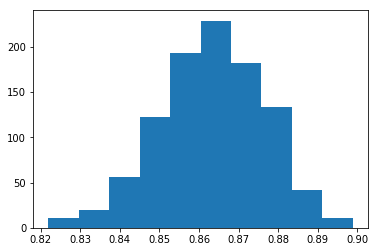

95.0% confidence interval 83.5% and 88.8%


In [60]:
#Ploting 95% confidence interval
plt.hist(gb_test_score)
plt.show()
# confidence intervals
alpha = 0.95                              
#p = ((1.0-alpha)/2.0) * 100              
lower = np.percentile(gb_test_score, 2.5)  
#p = (alpha+((1.0-alpha)/2.0)) * 100
upper = np.percentile(gb_test_score, 97.5)
print('%.1f%% confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [62]:
#Bootstrap model with RandomForestRegressor

from sklearn.utils import resample


n_iterations = 1000
n_size = len(concrete_data_scaled)
rf_test_score = []

for i in range(n_iterations):
    train = resample(values,n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    
    rf_b = RandomForestRegressor()
    rf_b.fit(train[:,:-1],train[:,-1])
    predictions = rf_b.predict(test[:,:-1])
    
    
    score = rf_b.score(test[:,:-1],test[:,-1])
    
    rf_test_score.append(score)

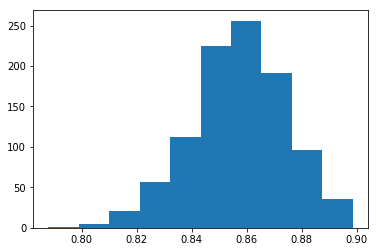

95.0% confidence interval 82.1% and 89.0%


In [63]:
#Ploting 95% confidence interval
plt.hist(rf_test_score)
plt.show()
# confidence intervals
alpha = 0.95                              
#p = ((1.0-alpha)/2.0) * 100              
lower = np.percentile(rf_test_score, 2.5)  
#p = (alpha+((1.0-alpha)/2.0)) * 100
upper = np.percentile(rf_test_score, 97.5)
print('%.1f%% confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [64]:
#Now we take RandomForestRegressor and work with RandomSearchCV and GridSearchCV to find the best optimal parameters

In [65]:
#Parameters of RandomForestRegressor

rf = RandomForestRegressor(random_state=1)

rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
#Inputs for parameter grid
bootstrap = [True, False]
#min_samples_leaf = list(np.random.randint(2,6,3))
min_samples_leaf = list(range(2,6))
#max_depth = list(np.random.randint(2,7,3))
max_depth = list(range(2,7))
max_depth.append(None)
max_features = ['auto', 'log2']
#n_estimators = list(np.random.randint(10,20,4))
n_estimators = list(range(10,17))
#min_samples_split = list(np.random.randint(2,10,3))
min_samples_split = list(range(2,7))
    
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 11, 12, 13, 14, 15, 16], 'max_features': ['auto', 'log2'], 'max_depth': [2, 3, 4, 5, 6, None], 'min_samples_split': [2, 3, 4, 5, 6], 'min_samples_leaf': [2, 3, 4, 5], 'bootstrap': [True, False]}


In [68]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=4,random_state=1)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [10, 11, 12, 13, 14, 15, 16], 'max_features': ['auto', 'log2'], 'max_depth': [2, 3, 4, 5, 6, None], 'min_samples_split': [2, 3, 4, 5, 6], 'min_samples_leaf': [2, 3, 4, 5], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [69]:
rf_random.best_params_

{'n_estimators': 12,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 5,
 'bootstrap': True}

In [72]:
best_randomCV_model = rf_random.best_estimator_

In [73]:
best_randomCV_model.score(X_test,y_test)

0.7947129855784392

In [74]:
print('Score on test data from best estimator of RandomsearchCV is ', (best_randomCV_model.score(X_test,y_test)))

Score on test data from best estimator of RandomsearchCV is  0.7947129855784392


In [75]:
#Building a RandomForestRegressor with best paramenters from RandomsearchCV
rf_final = RandomForestRegressor(n_estimators=12, min_samples_split=6, min_samples_leaf= 3, max_features= 'auto', max_depth= 5, bootstrap= True)
rf_final.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [76]:
print(rf_final.score(X_train,y_train))
print(rf_final.score(X_test,y_test))

0.8648733030046742
0.8125137222014431


In [77]:
#GridsearchCV
from sklearn.model_selection import GridSearchCV

In [78]:
#Inputs for parameter grid
bootstrap = [True, False]
min_samples_leaf = [2,4,5]
max_depth = [4,6,8]
max_features = [2, 3]
n_estimators = [10,13,15]
min_samples_split = [2,3,5,6]
    
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [10, 13, 15], 'max_features': [2, 3], 'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 5, 6], 'min_samples_leaf': [2, 4, 5], 'bootstrap': [True, False]}


In [79]:
rf_grid = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 13, 15], 'max_features': [2, 3], 'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 5, 6], 'min_samples_leaf': [2, 4, 5], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [80]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 13}

In [81]:
best_grid = rf_grid.best_estimator_

In [82]:
best_grid.score(X_test,y_test)

0.8567021390168158

In [83]:
print('Score on test data from best estimator of GridsearchCV is ', (best_grid.score(X_test,y_test)))

Score on test data from best estimator of GridsearchCV is  0.8567021390168158


In [84]:
#Building a RandomForestRegressor with best paramenters from RandomsearchCV
rf_grid_final = RandomForestRegressor(n_estimators=13, min_samples_split=2, min_samples_leaf= 2, max_features= 2, max_depth= 8, bootstrap= True)
rf_grid_final.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=13, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [85]:
print(rf_grid_final.score(X_train,y_train))
print(rf_grid_final.score(X_test,y_test))

0.9324119593977109
0.860881489067762


In [86]:
#Summary
#RandomForestRegressor gives better results for given dataset
#Using RandomsearchCV and GridsearchCV we can able to get the best parameters for build the model
#Getting Best parameters from RandomsearchCV and GridsearchCV depends on input we had given to param_grid